# Open Ocean
# Open Earth Fundation
---------------------------------------------------------------------------------------------------------------------
Authors: Margaux Filippi & Maureen Fonseca

---------------------------------------------------------------------------------------------------------------------

<h1> Step 2: calculate different metrics for each modulating factor </h1>
    
This notebook is the second part of the Step1_Curate_IUCN_RedList.ipynb

<h2> Modulating Factor 5: Habitats' Survey  <h2>

<h2> Data needed for this project </h2>

The data was output by:
- Manual selection in [GEBCO](https://www.gebco.net/) 
- Overlap of [IUCN Ecosystem Typology](https://zenodo.org/record/5090419) with [ACMC shapefile](https://drive.google.com/drive/folders/11aaQs_R-jCE2ZwVBZVLjTAlleaJdOa_I?usp=share_link)

Under: 

`Ocean Program > data > data_processed > Bathymetry`

`Ocean Program > data > data_processed > Typology_ACMC V0`

### Importing libraries

In [1]:
import geopandas as gpd

In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
import glob

In [4]:
import shapely
from shapely.geometry import Polygon, Point

In [5]:
import fiona; #help(fiona.open)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import timeit

In [8]:
from netCDF4 import Dataset
import cmocean
import geopandas as gpd
from matplotlib.ticker import LinearLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

OEF functions

In [9]:
from marinebiodiversity_utils import *

<h1> 2.1. Load data </h1>

<h2> 2.1.1 Get the conservation area</h2>

Mostly for plotting.

<h3> Import ACMC </h3>

In [10]:
ACMC = gpd.read_file('../Data/Geospatial_ACMC/ACMC.shp')

Inspect the Coordinate Reference Systems (CRS).

In [11]:
print(ACMC.crs)

None


In [12]:
ACMC = ACMC.set_crs(epsg=4326, allow_override=True)

In [13]:
print(ACMC.crs)

epsg:4326


### Import Ecological Habitats data

In [14]:
source_dir = '../Data/EcosystemTypology/'
fnames = np.sort(glob.glob(source_dir + "/*.shp"))
print(fnames)

['../Data/EcosystemTypology/M1_3_Photic_coral_reefs_ACMC.shp'
 '../Data/EcosystemTypology/M1_5_Marine_animal_forests_ACMC.shp'
 '../Data/EcosystemTypology/M1_6_Subtidal_rock_reefs_ACMC.shp'
 '../Data/EcosystemTypology/M1_7_Subtidal_sand_beds_ACMC.shp'
 '../Data/EcosystemTypology/M1_8_Subtidal_mud_plains_ACMC.shp'
 '../Data/EcosystemTypology/M2_1_Epipelagic_waters_ACMC.shp'
 '../Data/EcosystemTypology/M2_2_Mesopelagic_ocean_waters_ACMC.shp'
 '../Data/EcosystemTypology/M2_3_Bathypelagic_ocean_waters_ACMC.shp'
 '../Data/EcosystemTypology/M2_4_Abyssopelagic_ocean_waters_ACMC.shp'
 '../Data/EcosystemTypology/M3_1_Continental_slopes_ACMC.shp'
 '../Data/EcosystemTypology/M3_3_Abyssal_plains_ACMC.shp'
 '../Data/EcosystemTypology/M3_4_Seamounts_ACMC.shp'
 '../Data/EcosystemTypology/M3_5_Deepwater_biogenic_beds_ACMC.shp']


### Import Physical Habitats data

In [ ]:
fname = "../../Bathymetry/Cocos.nc"
fh = Dataset(fname, 'r')

Import the specific variables.

In [20]:
Z = fh.variables["elevation"][:].data
lon = fh.variables["lon"][:].data
lat = fh.variables["lat"][:].data

NameError: name 'fh' is not defined

<h1> 2.2. Preliminary calculations </h1> 

### 2.2.1 Physical habitat types

Depth-defined marine ecological habitats
- epipelagic: 0-200m
- mesopelagic: 200-1000m
- bathypelagic: 1000-4000m
- abyssipelagic: 4000-6000m

In [ ]:
area_of_conservation = ACMC.geometry.item()

In [ ]:
area_of_conservation

Grid longitude and latitude for pcolor plot.

In [ ]:
Lon, Lat = np.meshgrid(lon, lat)

The idea here is eliminate all the value > 0, i.e, we want to have only values for the ocean

In [ ]:
ocean = np.multiply(Z,np.multiply(Z<=0, Z>np.min(Z)))
bathymetry = np.where(ocean==0, np.nan, ocean)

Let's go to make a function that calculates the different physical habitats

where z_0 is the shallowest depth

In [ ]:
def physicalHabitat(z_0,z_1,z):
    Filter = np.multiply(z,np.multiply(z<=z_0, z>z_1))
    habitat = np.where(Filter==0, np.nan, Filter)
    return habitat

In [ ]:
epipelagic = physicalHabitat(0,-200,bathymetry)
mesopelagic = physicalHabitat(-200,-1000,bathymetry)
bathypelagic = physicalHabitat(-1000,-4000,bathymetry)
abyssopelagic = physicalHabitat(-4000,-6000,bathymetry)

**Plots**

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

pcol = ax.pcolor(Lon, Lat, epipelagic, cmap = cmocean.cm.deep_r);
cbar = fig.colorbar(pcol, ax=ax, shrink=0.5)

ACMC.plot(ax=ax, alpha = 1, edgecolor='purple', facecolor="none")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_aspect('equal')
ax.set_title('Marine Ecological Habitat: Epipelagic', fontweight='bold', fontsize=14, loc='left')
ax.set_title('ACMC', fontsize=12, loc='right')

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

pcol = ax.pcolor(Lon, Lat, mesopelagic, cmap = cmocean.cm.deep_r);
cbar = fig.colorbar(pcol, ax=ax, shrink=0.5)

ACMC.plot(ax=ax, alpha = 1, edgecolor='purple', facecolor="none")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_aspect('equal')
ax.set_title('Marine Ecological Habitat: Mesopelagic', fontweight='bold', fontsize=14, loc='left')
ax.set_title('ACMC', fontsize=12, loc='right')

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

pcol = ax.pcolor(Lon, Lat, bathypelagic, cmap = cmocean.cm.deep_r);
cbar = fig.colorbar(pcol, ax=ax, shrink=0.5)

ACMC.plot(ax=ax, alpha = 1, edgecolor='purple', facecolor="none")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_aspect('equal')
ax.set_title('Marine Ecological Habitat: Bathypelagic', fontweight='bold', fontsize=14, loc='left')
ax.set_title('ACMC', fontsize=12, loc='right')

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

pcol = ax.pcolor(Lon, Lat, abyssopelagic, cmap = cmocean.cm.deep_r);
cbar = fig.colorbar(pcol, ax=ax, shrink=0.5)

ACMC.plot(ax=ax, alpha = 1, edgecolor='purple', facecolor="none")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_aspect('equal')
ax.set_title('Marine Ecological Habitat: Abyssopelagic', fontweight='bold', fontsize=14, loc='left')
ax.set_title('ACMC', fontsize=12, loc='right')

So, with the lasts plots we can see the physical habitats in ACMC, where the open ocean predomin.

### 2.2.2 Ecological Habitats: Ecosystem Typology from IUCN

In [15]:
EcoTypo = []
Geometry = []

for x in range(len(fnames)):
    gdf = gpd.read_file(fnames[x])
    geo = gdf.geometry
    name = str(fnames[x][26:-4])
    
    EcoTypo.append(name)
    Geometry.append(geo)

In [16]:
joined = gpd.GeoDataFrame(pd.concat(Geometry, ignore_index=True))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [24]:
joined['Name'] = EcoTypo
joined['ID'] = list(range(0,13))

In [25]:
joined

,geometry,Name,ID
0,"POLYGON ((-87.25000 5.60000, -87.25000 5.63333...",M1_3_Photic_coral_reefs_ACMC,0
1,"POLYGON ((-86.97022 5.52314, -86.97623 5.51723...",M1_5_Marine_animal_forests_ACMC,1
2,"POLYGON ((-86.97022 5.52314, -86.97623 5.51723...",M1_6_Subtidal_rock_reefs_ACMC,2
3,"POLYGON ((-86.97022 5.52314, -86.97623 5.51723...",M1_7_Subtidal_sand_beds_ACMC,3
4,"POLYGON ((-86.97022 5.52314, -86.97623 5.51723...",M1_8_Subtidal_mud_plains_ACMC,4
5,"POLYGON ((-86.03401 2.31691, -86.04534 2.31310...",M2_1_Epipelagic_waters_ACMC,5
6,"POLYGON ((-86.03401 2.31691, -86.04534 2.31310...",M2_2_Mesopelagic_ocean_waters_ACMC,6
7,"MULTIPOLYGON (((-86.90000 5.68333, -86.90000 5...",M2_3_Bathypelagic_ocean_waters_ACMC,7
8,"MULTIPOLYGON (((-87.03333 6.51667, -87.10000 6...",M2_4_Abyssopelagic_ocean_waters_ACMC,8
9,"POLYGON ((-86.91932 5.45154, -86.93833 5.39093...",M3_1_Continental_slopes_ACMC,9


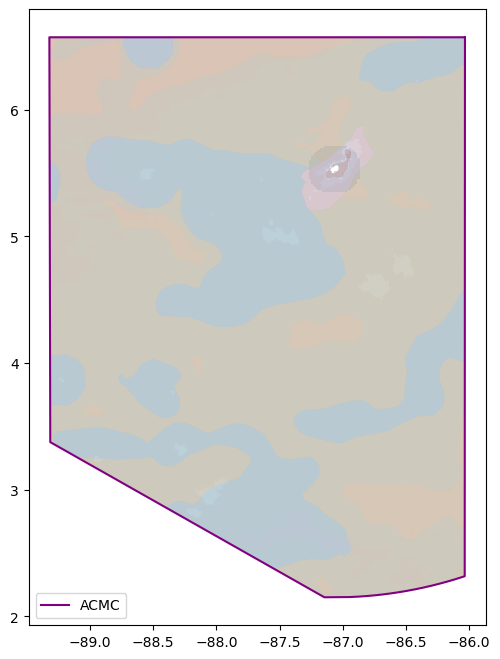

In [26]:
fig, ax = plt.subplots(figsize = (8,8))

ax.set_aspect('equal')

x, y = ACMC.geometry.item().exterior.xy
plt.plot(x,y, c = 'purple', label = 'ACMC')

#joined.plot(ax=ax, alpha = 0.15, column = 'Name',cmap = 'tab20', edgecolor = 'grey', linewidth = 0.01, legend = True)
joined.plot(ax=ax, alpha = 0.15,cmap = 'tab20', edgecolor = 'grey', linewidth = 0.01)

plt.legend()
plt.show();

In [28]:
def count_overlapping_features(in_gdf):
    
    # Get the name of the column containing the geometries
    geom_col = in_gdf.geometry.name
    
    # Setting up a single piece that will be split later
    input_parts = [in_gdf.unary_union.buffer(0)]
    
    # Finding all the "cutting" boundaries. Note: if the input GDF has 
    # MultiPolygons, it will treat each of the geometry's parts as individual
    # pieces.
    cutting_boundaries = []
    for i, row in in_gdf.iterrows():
        this_row_geom = row[geom_col]
        this_row_boundary = this_row_geom.boundary
        if this_row_boundary.type[:len('multi')].lower() == 'multi':
            cutting_boundaries = cutting_boundaries + list(this_row_boundary.geoms)
        else:
            cutting_boundaries.append(this_row_boundary)
    
    
    # Split the big input geometry using each and every cutting boundary
    for boundary in cutting_boundaries:
        splitting_results = []
        for j,part in enumerate(input_parts):
            new_parts = list(shapely.ops.split(part, boundary).geoms)
            splitting_results = splitting_results + new_parts
        input_parts = splitting_results
    
    # After generating all of the split pieces, create a new GeoDataFrame
    new_gdf = gpd.GeoDataFrame({'id':range(len(splitting_results)),
                                geom_col:splitting_results,
                                },
                               crs=in_gdf.crs,
                               geometry=geom_col)
    
    # Find the new centroids.
    new_gdf['geom_centroid'] = new_gdf.centroid
    
    # Starting the count at zero
    new_gdf['count_intersections'] = 0
    
    # For each of the `new_gdf`'s rows, find how many overlapping features 
    # there are from the input GDF.
    for i,row in new_gdf.iterrows():
        new_gdf.loc[i,'count_intersections'] = in_gdf.intersects(row['geom_centroid']).astype(int).sum()
        pass
    
    # Dropping the column containing the centroids
    new_gdf = new_gdf.drop(columns=['geom_centroid'])[['id','count_intersections',geom_col]]
    
    return new_gdf

/tmp/ipykernel_371/687748030.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  new_gdf['geom_centroid'] = new_gdf.centroid


<AxesSubplot:>

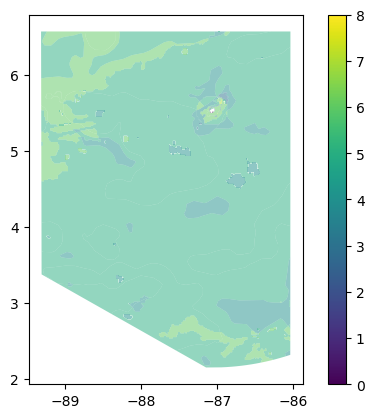

In [35]:
# Applying the function to the input data
out_df = count_overlapping_features(joined)
out_df.plot(alpha=0.5, column='count_intersections', legend = True)

In [32]:
out_df

,id,count_intersections,geometry
0,0,4,"POLYGON ((-89.09926 3.25354, -89.09926 3.25354..."
1,1,5,"POLYGON ((-89.15366 3.28424, -89.15366 3.28424..."
2,2,5,"POLYGON ((-89.24382 3.34456, -89.26566 3.35694..."
3,3,5,"POLYGON ((-89.26714 3.35848, -89.28253 3.37450..."
4,4,4,"POLYGON ((-89.29575 3.43006, -89.29575 3.43006..."
...,...,...,...
519,519,2,"POLYGON ((-87.06667 5.55142, -87.06667 5.55000..."
520,520,4,"POLYGON ((-87.04001 5.51667, -87.03333 5.52271..."
521,521,4,"POLYGON ((-87.03333 5.55400, -87.03675 5.55689..."
522,522,4,"POLYGON ((-87.06931 5.55000, -87.08189 5.54325..."


TO BE COMPLETED!!!